## Подключение библиотек и пакетов

In [1]:
import numpy as np
import pandas as pd
import os
from time import time

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка предобработанных данных

Настройка глобальных переменных

In [2]:
if 'google.colab' in str(get_ipython()):
    data_dir = os.path.join(os.getcwd(), '/content/data/car_price')
else:
    data_dir = os.path.join(os.getcwd(), '../../../data/car_price')


img_dir = os.path.join(os.getcwd(), 'img_ols')
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

Загрузка данных с репозитория

In [3]:
if 'google.colab' in str(get_ipython()):
    !pip install rm
    !pip install wget
    !pip install gzip-reader
    !rm -r /content/data
    !wget -P data/weatherAUS https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/car_price/car_price_prepocessed.csv

Чтение и просмотр данных

In [4]:
if 'google.colab' in str(get_ipython()):
    !pip install rm
    !pip install wget
    !pip install gzip-reader
    !rm -r /content/data
    !wget -P data/car_price https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/car_price/car_price_prepocessed.csv

Чтение данных

In [5]:
df = pd.read_csv(os.path.join(data_dir, 'car_price_prepocessed.csv'))
df.head()

,km,price,Audi A1,Audi A3,Compact,Convertible,Coupe,Other,Sedans,Station wagon,...,Shift paddles,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,56013,15770,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,80000,14500,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,83450,14640,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,73000,14500,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,16200,16790,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


Разделение данных на матрицу признаков и вектор ответов

In [6]:
y = df['price'].values
x = df.drop(['price'], axis=1).values

Разделение данных на обучающие и тестовые выборки

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False, random_state=42)

## Метод наименьших квадратов (OLS)

Подключение необходимых модулей

In [8]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import median_absolute_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler

from sklearn.linear_model import LinearRegression

Функция быстрого применения модели OLS

Создание и обучение модели; вывод точности работы алгоритма на обучающей выборке; кросс-валидация модели; вывод графика разброса регрессии и сравнение предсказания и тестовых ответов

In [9]:
def ols_fast_start(reg_lsm: make_pipeline, x_train, x_test, y_train, y_test,
                   scale_name: str, fig_title: str, img_name: str, img_dir):
  start_time = time()
  reg_lsm.fit(x_train, y_train)
  end_time = time()
  lreg_fit_time_txt = f'OLS algorithm learning time: {(end_time - start_time):.2f} sec.'

  # оценка работы алгоритма на обучающей выборке
  score_lsm = reg_lsm.score(x_train, y_train)
  score_lsm_txt = f'The accuracy of the OLS algorithm on a training set: {score_lsm:.2f}'

  # применение кросс-валидации модели
  start_time = time()
  cross_scores_lsm = cross_val_score(reg_lsm, x_train, y_train, scoring='r2', cv=5)
  end_time = time()
  cross_val_time_txt = f'Cross validation time: {(end_time - start_time):.2f} sec.'
  cross_val_result_txt = f'Cross validation results: {(list(map(lambda x: float("{:.2f}".format(x)), cross_scores_lsm)))}'

  # применение модели на тестовой выборке и оценка точности
  y_pred = reg_lsm.predict(x_test)
  r2_score_txt = f'Regression Score (R2, coefficient of determination): {r2_score(y_test, y_pred):.3f}'
  variance_score_txt = f'Variance Score: {explained_variance_score(y_test, y_pred):.3f}'
  max_error_txt = f'Max Error: ${max_error(y_test, y_pred):.3f}'
  mean_absolute_error_txt = f'Mean Absolute Error: ${mean_absolute_error(y_test, y_pred):.3f}'
  mean_squared_error_txt = f'Mean Squared Error (RMSE): ${mean_squared_error(y_test, y_pred, squared=False):.3f}'
  median_absolute_error_txt = f'Median Absolute Error: ${median_absolute_error(y_test, y_pred):.3f}'

  # построение графика разброса регресии предсказанной и имеющейся тестовой
  data = np.concatenate([x_test[:, 0].reshape(-1, 1), y_test.reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1)
  df_data = pd.DataFrame(data, columns=['x_test', 'y_test', 'y_pred'])

  km_to_price, ax = plt.subplots(figsize=(15, 6))
  sns.regplot(x='x_test', y='y_pred', data=df_data, label='Prediction Y', marker='.', ax=ax)
  sns.regplot(x='x_test', y='y_test', data=df_data, label='Test Y', marker='.', ax=ax)
  ax.set_ylabel('Price, $')
  ax.set_xlabel('Kilometers')
  ax.set_title(fig_title)
  ax.legend()

  description = f'{scale_name}\
  \n{lreg_fit_time_txt}\n{score_lsm_txt}\
  \n{cross_val_time_txt}\n{cross_val_result_txt}\
  \n{r2_score_txt}\n{variance_score_txt}\n{max_error_txt}\
  \n{mean_absolute_error_txt}\n{mean_squared_error_txt}\
  \n{median_absolute_error_txt}'

  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  ax.text(x=-0.01, y=-0.6, s=description, transform=ax.transAxes, fontsize=12,
          verticalalignment='bottom', bbox=props)
  plt.savefig(os.path.join(img_dir, img_name))

Применение модели OLS

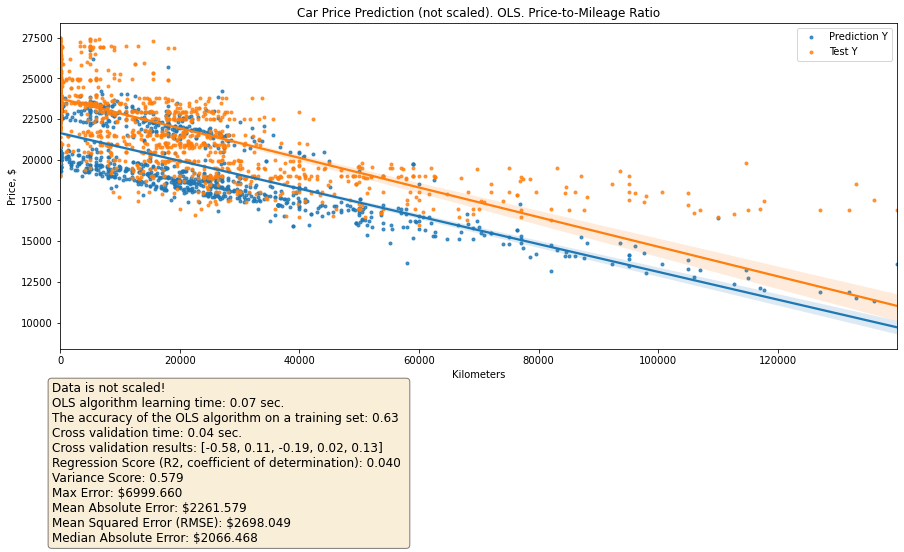

In [10]:
reg_lsm = make_pipeline(LinearRegression(n_jobs=-1))
ols_fast_start(LinearRegression(n_jobs=-1), x_train, x_test, y_train, y_test,
               scale_name='Data is not scaled!',
               fig_title='Car Price Prediction (not scaled). OLS. Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (not scaled). OLS. Price-to-Mileage Ratio.png', 
               img_dir=img_dir)